In [1]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset

from src import VRAE
from src.utils import *

In [2]:
n_epochs = 1000

hidden_size = 128
hidden_layer_depth = 1
latent_length = 30
batch_size = 32
learning_rate = 0.0005
dropout_rate = 0.0
optimizer = 'Adam'                              # options: ADAM, SGD
cuda = True                                     # options: True, False
print_every=30
clip = True                                     # options: True, False
max_grad_norm=5
loss = 'MSELoss'                                # options: SmoothL1Loss, MSELoss
block = 'LSTM'                                  # options: LSTM, GRU
saved_model_path = './saved_models'

In [3]:
directory_list = get_files_directory_list()
directory_list = sorted(directory_list)

random_index = 115
random_path = directory_list[random_index]

X_train, X_val, y_train, y_val = get_data_from_directory(random_path)
X, y = get_data_from_directory(random_path, split=False)


print('Dataset: ', random_path)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape:  ', X_val.shape)
print('y_test shape:  ', y_val.shape)

Dataset:  Trace
X_train shape:  (100, 275, 1)
y_train shape:  (100, 1)
X_test shape:   (100, 275, 1)
y_test shape:   (100, 1)


In [4]:
num_classes = len(np.unique(y_train))
base = np.min(y_train)  # Check if data is 0-based
if base != 0:
    y_train -= base
y_val -= base

In [5]:
train_dataset = TensorDataset(torch.from_numpy(X_train))
test_dataset = TensorDataset(torch.from_numpy(X_val))

In [6]:
sequence_length = X_train.shape[1]
number_of_features = X_train.shape[2]

print('sequence_length', sequence_length)
print('number_of_features', number_of_features)

sequence_length 275
number_of_features 1


In [7]:
# test GPU
torch.zeros(sequence_length, batch_size, 1, requires_grad=True).shape

torch.Size([275, 32, 1])

In [8]:
vrae = VRAE(sequence_length=sequence_length,
            number_of_features = number_of_features,
            hidden_size = hidden_size, 
            hidden_layer_depth = hidden_layer_depth,
            latent_length = latent_length,
            batch_size = batch_size,
            learning_rate = learning_rate,
            n_epochs = n_epochs,
            dropout_rate = dropout_rate,
            optimizer = optimizer, 
            cuda = cuda,
            print_every=print_every, 
            clip=clip, 
            max_grad_norm=max_grad_norm,
            loss = loss,
            block = block,
            dload = saved_model_path)

/home/samir/anaconda3/envs/py36/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning:

size_average and reduce args will be deprecated, please use reduction='sum' instead.



In [9]:
vrae.fit(train_dataset)

Epoch: 0
Average loss: 13166.6313
Epoch: 1
Average loss: 13151.1406
Epoch: 2
Average loss: 13141.4902
Epoch: 3
Average loss: 13135.1128
Epoch: 4
Average loss: 13123.2534
Epoch: 5
Average loss: 13122.3740
Epoch: 6
Average loss: 13126.0688
Epoch: 7
Average loss: 13097.0151
Epoch: 8
Average loss: 13079.8140
Epoch: 9
Average loss: 13081.2881
Epoch: 10
Average loss: 13073.8306
Epoch: 11
Average loss: 13055.5361
Epoch: 12
Average loss: 13034.8535
Epoch: 13
Average loss: 12974.4268
Epoch: 14
Average loss: 12986.7021
Epoch: 15
Average loss: 12935.0083
Epoch: 16
Average loss: 12801.6890
Epoch: 17
Average loss: 12617.5471
Epoch: 18
Average loss: 12233.6863
Epoch: 19
Average loss: 11625.8032
Epoch: 20
Average loss: 14063.1069
Epoch: 21
Average loss: 11954.4321
Epoch: 22
Average loss: 10749.0815
Epoch: 23
Average loss: 10106.1360
Epoch: 24
Average loss: 10497.9839
Epoch: 25
Average loss: 10505.0100
Epoch: 26
Average loss: 10315.3347
Epoch: 27
Average loss: 11119.3359
Epoch: 28
Average loss: 10916.

Average loss: 10169.4905
Epoch: 232
Average loss: 10248.3171
Epoch: 233
Average loss: 10288.8494
Epoch: 234
Average loss: 10368.5071
Epoch: 235
Average loss: 10321.4204
Epoch: 236
Average loss: 10206.8960
Epoch: 237
Average loss: 10338.5825
Epoch: 238
Average loss: 10440.5383
Epoch: 239
Average loss: 10282.5442
Epoch: 240
Average loss: 10440.6802
Epoch: 241
Average loss: 10249.4937
Epoch: 242
Average loss: 10244.6045
Epoch: 243
Average loss: 10396.8323
Epoch: 244
Average loss: 10165.6621
Epoch: 245
Average loss: 10456.1731
Epoch: 246
Average loss: 10173.9429
Epoch: 247
Average loss: 10232.5996
Epoch: 248
Average loss: 10204.5291
Epoch: 249
Average loss: 10206.7766
Epoch: 250
Average loss: 10248.5327
Epoch: 251
Average loss: 10115.0103
Epoch: 252
Average loss: 10274.1057
Epoch: 253
Average loss: 10138.9458
Epoch: 254
Average loss: 10238.0947
Epoch: 255
Average loss: 10676.4849
Epoch: 256
Average loss: 10340.4019
Epoch: 257
Average loss: 10701.7629
Epoch: 258
Average loss: 10819.3303
Epo

Average loss: 10199.0769
Epoch: 460
Average loss: 10110.1870
Epoch: 461
Average loss: 10141.5442
Epoch: 462
Average loss: 10116.8379
Epoch: 463
Average loss: 10262.2263
Epoch: 464
Average loss: 10215.3896
Epoch: 465
Average loss: 10104.6624
Epoch: 466
Average loss: 10008.2888
Epoch: 467
Average loss: 10277.2520
Epoch: 468
Average loss: 10166.0540
Epoch: 469
Average loss: 10148.8828
Epoch: 470
Average loss: 10316.8418
Epoch: 471
Average loss: 10428.5483
Epoch: 472
Average loss: 10123.1318
Epoch: 473
Average loss: 10111.6624
Epoch: 474
Average loss: 10248.8513
Epoch: 475
Average loss: 10191.3132
Epoch: 476
Average loss: 10123.9751
Epoch: 477
Average loss: 10205.4790
Epoch: 478
Average loss: 10150.3018
Epoch: 479
Average loss: 10106.9094
Epoch: 480
Average loss: 10300.7314
Epoch: 481
Average loss: 10069.8223
Epoch: 482
Average loss: 10028.2612
Epoch: 483
Average loss: 10241.7231
Epoch: 484
Average loss: 10253.9778
Epoch: 485
Average loss: 10305.9563
Epoch: 486
Average loss: 10444.9888
Epo

Average loss: 10190.4214
Epoch: 688
Average loss: 10171.3420
Epoch: 689
Average loss: 10427.3862
Epoch: 690
Average loss: 10343.2083
Epoch: 691
Average loss: 10199.0752
Epoch: 692
Average loss: 10098.0691
Epoch: 693
Average loss: 10170.4666
Epoch: 694
Average loss: 10265.3474
Epoch: 695
Average loss: 10170.3203
Epoch: 696
Average loss: 10177.4370
Epoch: 697
Average loss: 10128.7615
Epoch: 698
Average loss: 10277.6567
Epoch: 699
Average loss: 10310.2612
Epoch: 700
Average loss: 10232.1094
Epoch: 701
Average loss: 10120.9563
Epoch: 702
Average loss: 10518.6936
Epoch: 703
Average loss: 10250.0869
Epoch: 704
Average loss: 10548.8489
Epoch: 705
Average loss: 10149.4021
Epoch: 706
Average loss: 10141.7148
Epoch: 707
Average loss: 10198.9773
Epoch: 708
Average loss: 10185.9668
Epoch: 709
Average loss: 10194.5549
Epoch: 710
Average loss: 10116.8220
Epoch: 711
Average loss: 10083.2571
Epoch: 712
Average loss: 10021.4937
Epoch: 713
Average loss: 10174.9216
Epoch: 714
Average loss: 10256.3276
Epo

Average loss: 10173.1638
Epoch: 916
Average loss: 10119.2249
Epoch: 917
Average loss: 10112.3889
Epoch: 918
Average loss: 10188.3127
Epoch: 919
Average loss: 10049.7993
Epoch: 920
Average loss: 9994.4702
Epoch: 921
Average loss: 9947.5042
Epoch: 922
Average loss: 10174.2283
Epoch: 923
Average loss: 10167.1509
Epoch: 924
Average loss: 10395.9766
Epoch: 925
Average loss: 10778.6418
Epoch: 926
Average loss: 10114.6965
Epoch: 927
Average loss: 10234.5703
Epoch: 928
Average loss: 10261.7019
Epoch: 929
Average loss: 10136.7971
Epoch: 930
Average loss: 10197.9971
Epoch: 931
Average loss: 10160.6589
Epoch: 932
Average loss: 10265.8757
Epoch: 933
Average loss: 9994.8301
Epoch: 934
Average loss: 10253.1785
Epoch: 935
Average loss: 10087.4004
Epoch: 936
Average loss: 10216.1631
Epoch: 937
Average loss: 10260.6399
Epoch: 938
Average loss: 10184.4402
Epoch: 939
Average loss: 10095.1409
Epoch: 940
Average loss: 10172.1506
Epoch: 941
Average loss: 10207.7261
Epoch: 942
Average loss: 10075.7595
Epoch:

In [10]:
vrae.save(random_path+'_vrae.pth')
vrae.load(saved_model_path+'/'+random_path+'_vrae.pth')

In [11]:
z_run = vrae.transform(train_dataset)
z_run.shape

(96, 30)

Trace


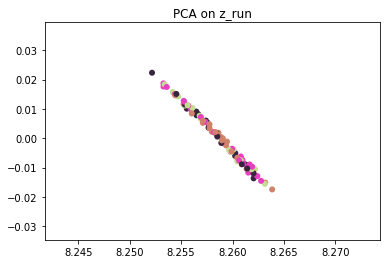

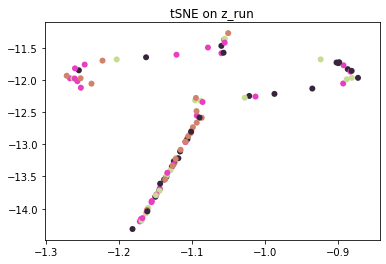

In [12]:
print(random_path)
plot_clustering(z_run, y_val, engine='matplotlib', download=False)